In [13]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress

# Study data files
LAcrime_path = "Crime_Data_from_2020_to_Present.csv"

# Read the Los Angeles Crime data 
LACrime = pd.read_csv(LAcrime_path)

# Display the data table for preview
LACrime

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,10304468,01/08/2020 12:00:00 AM,01/08/2020 12:00:00 AM,2230,3,Southwest,377,2,624,BATTERY - SIMPLE ASSAULT,...,AO,Adult Other,624.0,NaN,NaN,NaN,1100 W 39TH PL,NaN,34.0141,-118.2978
1,190101086,01/02/2020 12:00:00 AM,01/01/2020 12:00:00 AM,330,1,Central,163,2,624,BATTERY - SIMPLE ASSAULT,...,IC,Invest Cont,624.0,NaN,NaN,NaN,700 S HILL ST,NaN,34.0459,-118.2545
2,200110444,04/14/2020 12:00:00 AM,02/13/2020 12:00:00 AM,1200,1,Central,155,2,845,SEX OFFENDER REGISTRANT OUT OF COMPLIANCE,...,AA,Adult Arrest,845.0,NaN,NaN,NaN,200 E 6TH ST,NaN,34.0448,-118.2474
3,191501505,01/01/2020 12:00:00 AM,01/01/2020 12:00:00 AM,1730,15,N Hollywood,1543,2,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),...,IC,Invest Cont,745.0,998.0,NaN,NaN,5400 CORTEEN PL,NaN,34.1685,-118.4019
4,191921269,01/01/2020 12:00:00 AM,01/01/2020 12:00:00 AM,415,19,Mission,1998,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",...,IC,Invest Cont,740.0,NaN,NaN,NaN,14400 TITUS ST,NaN,34.2198,-118.4468
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
815877,231604807,01/27/2023 12:00:00 AM,01/26/2023 12:00:00 AM,1800,16,Foothill,1663,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",...,IC,Invest Cont,740.0,NaN,NaN,NaN,12500 BRANFORD ST,NaN,34.2466,-118.4054
815878,231606525,03/22/2023 12:00:00 AM,03/22/2023 12:00:00 AM,1000,16,Foothill,1602,1,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",...,IC,Invest Cont,230.0,NaN,NaN,NaN,12800 FILMORE ST,NaN,34.2790,-118.4116
815879,231210064,04/12/2023 12:00:00 AM,04/12/2023 12:00:00 AM,1630,12,77th Street,1239,1,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",...,IC,Invest Cont,230.0,NaN,NaN,NaN,6100 S VERMONT AV,NaN,33.9841,-118.2915
815880,230115220,07/02/2023 12:00:00 AM,07/01/2023 12:00:00 AM,1,1,Central,154,1,352,PICKPOCKET,...,IC,Invest Cont,352.0,NaN,NaN,NaN,500 S MAIN ST,NaN,34.0467,-118.2485


In [14]:
# Display the data table info for preview
LACrime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 815882 entries, 0 to 815881
Data columns (total 28 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DR_NO           815882 non-null  int64  
 1   Date Rptd       815882 non-null  object 
 2   DATE OCC        815882 non-null  object 
 3   TIME OCC        815882 non-null  int64  
 4   AREA            815882 non-null  int64  
 5   AREA NAME       815882 non-null  object 
 6   Rpt Dist No     815882 non-null  int64  
 7   Part 1-2        815882 non-null  int64  
 8   Crm Cd          815882 non-null  int64  
 9   Crm Cd Desc     815882 non-null  object 
 10  Mocodes         703120 non-null  object 
 11  Vict Age        815882 non-null  int64  
 12  Vict Sex        708690 non-null  object 
 13  Vict Descent    708682 non-null  object 
 14  Premis Cd       815873 non-null  float64
 15  Premis Desc     815402 non-null  object 
 16  Weapon Used Cd  284434 non-null  float64
 17  Weapon Des

In [16]:
# remove unnessary columns : 
columns_to_drop = ["Date Rptd", "TIME OCC", "Part 1-2", "Mocodes", "Crm Cd 1", "Crm Cd 2", "Crm Cd 3", "Crm Cd 4", "Cross Street", "DR_NO", "Rpt Dist No", "Vict Descent", "Premis Desc", "Premis Cd", "Weapon Used Cd", "Weapon Desc", "LAT", "LON"]
dropped_LAcrime_df = LACrime.drop(columns=columns_to_drop)
dropped_LAcrime_df.head()

,DATE OCC,AREA,AREA NAME,Crm Cd,Crm Cd Desc,Vict Age,Vict Sex,Status,Status Desc,LOCATION
0,01/08/2020 12:00:00 AM,3,Southwest,624,BATTERY - SIMPLE ASSAULT,36,F,AO,Adult Other,1100 W 39TH PL
1,01/01/2020 12:00:00 AM,1,Central,624,BATTERY - SIMPLE ASSAULT,25,M,IC,Invest Cont,700 S HILL ST
2,02/13/2020 12:00:00 AM,1,Central,845,SEX OFFENDER REGISTRANT OUT OF COMPLIANCE,0,X,AA,Adult Arrest,200 E 6TH ST
3,01/01/2020 12:00:00 AM,15,N Hollywood,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),76,F,IC,Invest Cont,5400 CORTEEN PL
4,01/01/2020 12:00:00 AM,19,Mission,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",31,X,IC,Invest Cont,14400 TITUS ST


In [32]:
dropped_LAcrime_df["DATE OCC"] = pd.to_datetime(dropped_LAcrime_df["DATE OCC"], format="%m/%d/%Y %I:%M:%S %p")
dropped_LAcrime_df = dropped_LAcrime_df.dropna()
dropped_LAcrime_df

C:\Users\14083\AppData\Local\Temp\ipykernel_26468\2018844757.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dropped_LAcrime_df["DATE OCC"] = pd.to_datetime(dropped_LAcrime_df["DATE OCC"], format="%m/%d/%Y %I:%M:%S %p")


,DATE OCC,AREA,AREA NAME,Crm Cd,Crm Cd Desc,Vict Age,Vict Sex,Status,Status Desc,LOCATION,Bureau,Parent Category
0,2020-01-08,3,Southwest,624,BATTERY - SIMPLE ASSAULT,36,F,AO,Adult Other,1100 W 39TH PL,Valley,Assault
1,2020-01-01,1,Central,624,BATTERY - SIMPLE ASSAULT,25,M,IC,Invest Cont,700 S HILL ST,Valley,Assault
2,2020-02-13,1,Central,845,SEX OFFENDER REGISTRANT OUT OF COMPLIANCE,0,X,AA,Adult Arrest,200 E 6TH ST,Valley,Other
3,2020-01-01,15,N Hollywood,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),76,F,IC,Invest Cont,5400 CORTEEN PL,Central,Burglary
4,2020-01-01,19,Mission,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",31,X,IC,Invest Cont,14400 TITUS ST,South,Burglary
...,...,...,...,...,...,...,...,...,...,...,...,...
815877,2023-01-26,16,Foothill,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",23,M,IC,Invest Cont,12500 BRANFORD ST,Weat,Burglary
815878,2023-03-22,16,Foothill,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",25,F,IC,Invest Cont,12800 FILMORE ST,Weat,Assault
815879,2023-04-12,12,77th Street,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",29,M,IC,Invest Cont,6100 S VERMONT AV,Valley,Assault
815880,2023-07-01,1,Central,352,PICKPOCKET,24,F,IC,Invest Cont,500 S MAIN ST,Valley,Other


In [40]:
def explore_bureau(val):
    if val in [1, 12, 14, 3, 6, 18, 20]:
        return "Valley"
    elif val in [15, 2, 11, 9, 21]:
        return "Central"
    elif val in [8, 10, 5, 4, 16]:
        return "West"
    elif val in [13, 3, 17, 19]:
        return "South"
    else:
        return "Other"


In [41]:
dropped_LAcrime_df["Bureau"] = dropped_LAcrime_df["AREA"].transform(explore_bureau)
dropped_LAcrime_df

,DATE OCC,AREA,AREA NAME,Crm Cd,Crm Cd Desc,Vict Age,Vict Sex,Status,Status Desc,LOCATION,Bureau,Parent Category
0,2020-01-08,3,Southwest,624,BATTERY - SIMPLE ASSAULT,36,F,AO,Adult Other,1100 W 39TH PL,Valley,Assault
1,2020-01-01,1,Central,624,BATTERY - SIMPLE ASSAULT,25,M,IC,Invest Cont,700 S HILL ST,Valley,Assault
2,2020-02-13,1,Central,845,SEX OFFENDER REGISTRANT OUT OF COMPLIANCE,0,X,AA,Adult Arrest,200 E 6TH ST,Valley,Other
3,2020-01-01,15,N Hollywood,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),76,F,IC,Invest Cont,5400 CORTEEN PL,Central,Burglary
4,2020-01-01,19,Mission,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",31,X,IC,Invest Cont,14400 TITUS ST,South,Burglary
...,...,...,...,...,...,...,...,...,...,...,...,...
815877,2023-01-26,16,Foothill,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",23,M,IC,Invest Cont,12500 BRANFORD ST,West,Burglary
815878,2023-03-22,16,Foothill,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",25,F,IC,Invest Cont,12800 FILMORE ST,West,Assault
815879,2023-04-12,12,77th Street,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",29,M,IC,Invest Cont,6100 S VERMONT AV,Valley,Assault
815880,2023-07-01,1,Central,352,PICKPOCKET,24,F,IC,Invest Cont,500 S MAIN ST,Valley,Other


In [43]:
def explore_parent_category(val):
    if val in [442, 341,662, 350, 480, 351, 420, 440, 354, 510]:
        return "Theft"
    elif val in [310, 330, 210, 220, 940, 745, 740, 648]:
        return "Burglary"
    elif val in [1236, 626, 121, 860, 850, 956, 888]:
        return "Sexual"
    elif val in [ 930, 624, 761, 625, 230]:
        return "Assault"
    else:
        return "Other"

In [50]:
dropped_LAcrime_df["Parent Category"] = dropped_LAcrime_df["Crm Cd"].transform(explore_parent_category)
dropped_LAcrime_df

,DATE OCC,AREA,AREA NAME,Crm Cd,Crm Cd Desc,Vict Age,Vict Sex,Status,Status Desc,LOCATION,Bureau,Parent Category
0,2020-01-08,3,Southwest,624,BATTERY - SIMPLE ASSAULT,36,F,AO,Adult Other,1100 W 39TH PL,Valley,Assault
1,2020-01-01,1,Central,624,BATTERY - SIMPLE ASSAULT,25,M,IC,Invest Cont,700 S HILL ST,Valley,Assault
2,2020-02-13,1,Central,845,SEX OFFENDER REGISTRANT OUT OF COMPLIANCE,0,X,AA,Adult Arrest,200 E 6TH ST,Valley,Other
3,2020-01-01,15,N Hollywood,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),76,F,IC,Invest Cont,5400 CORTEEN PL,Central,Burglary
4,2020-01-01,19,Mission,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",31,X,IC,Invest Cont,14400 TITUS ST,South,Burglary
...,...,...,...,...,...,...,...,...,...,...,...,...
815877,2023-01-26,16,Foothill,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",23,M,IC,Invest Cont,12500 BRANFORD ST,West,Burglary
815878,2023-03-22,16,Foothill,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",25,F,IC,Invest Cont,12800 FILMORE ST,West,Assault
815879,2023-04-12,12,77th Street,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",29,M,IC,Invest Cont,6100 S VERMONT AV,Valley,Assault
815880,2023-07-01,1,Central,352,PICKPOCKET,24,F,IC,Invest Cont,500 S MAIN ST,Valley,Other


In [56]:
# aggretate data for Bureau and Crime Incidences
print(dropped_LAcrime_df.groupby("Bureau")["Parent Category"].count())

Bureau
Central    158638
Other       34620
South       89674
Valley     285304
West       140454
Name: Parent Category, dtype: int64


In [66]:
# Import our dependencies
import matplotlib.pyplot as plt
import numpy as np
labels = dropped_LAcrime_df["Bureau"].unique()
labels.sort()

# The values of each section of the pie chart
sizes = list(dropped_LAcrime_df.groupby("Bureau")["Parent Category"].count())
print(labels, sizes)


['Central' 'Other' 'South' 'Valley' 'West'] [158638, 34620, 89674, 285304, 140454]


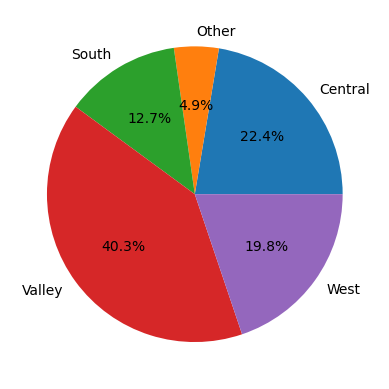

In [68]:
plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.show()

In [70]:
print(dropped_LAcrime_df.groupby(["Bureau", "Parent Category"])["AREA"].count())

Bureau   Parent Category
Central  Assault            29056
         Burglary           47135
         Other              26918
         Sexual             15214
         Theft              40315
Other    Assault             5735
         Burglary           10754
         Other               5592
         Sexual              2709
         Theft               9830
South    Assault            18370
         Burglary           25344
         Other              16298
         Sexual              9217
         Theft              20445
Valley   Assault            65336
         Burglary           83253
         Other              45298
         Sexual             26712
         Theft              64705
West     Assault            26777
         Burglary           40839
         Other              25580
         Sexual             13289
         Theft              33969
Name: AREA, dtype: int64


In [73]:
crime_count = list(dropped_LAcrime_df.groupby(["Bureau", "Parent Category"])["AREA"].count())


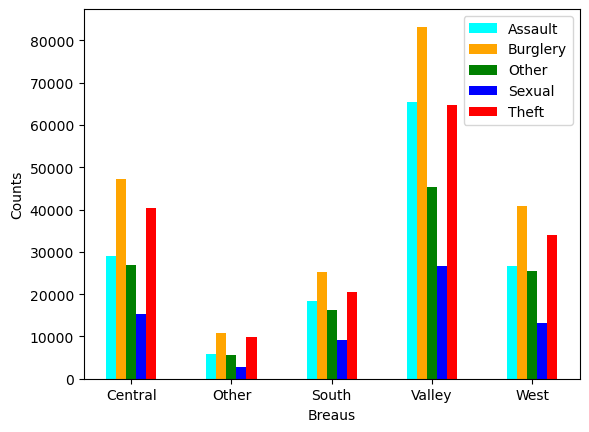

In [88]:
# Develop line chart of Bureau criminal instances over time
# create data 
x = np.arange(5) 
y1 = crime_count[0::5]
y2 = crime_count[1::5]
y3 = crime_count[2::5]
y4 = crime_count[3::5]
y5 = crime_count[4::5]

width = 0.1
  
# plot data in grouped manner of bar type 
plt.bar(x-0.2, y1, width, color='cyan') 
plt.bar(x-0.1, y2, width, color='orange') 
plt.bar(x, y3, width, color='green') 
plt.bar(x+0.1, y4, width, color='blue')
plt.bar(x+0.2, y5, width, color='red') 


plt.xticks(x, labels)
plt.xlabel("Breaus") 
plt.ylabel("Counts") 
plt.legend(["Assault", "Burglery", "Other", "Sexual","Theft"])
plt.show() 

['Assault' 'Burglary' 'Other' 'Sexual' 'Theft'] [29056, 47135, 26918, 15214, 40315]


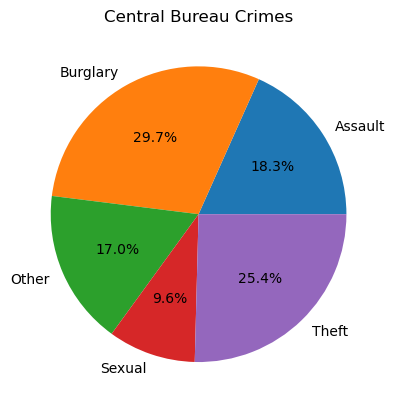

In [89]:

central_crimes = crime_count[0:5]             
crime_categories = dropped_LAcrime_df["Parent Category"].unique()
crime_categories.sort()

# The values of each section of the pie chart
print(crime_categories, central_crimes)   
plt.pie(central_crimes, labels=crime_categories, autopct='%1.1f%%')
plt.title("Central Bureau Crimes")
plt.show()   

['Assault' 'Burglary' 'Other' 'Sexual' 'Theft'] [5735, 10754, 5592, 2709, 9830]


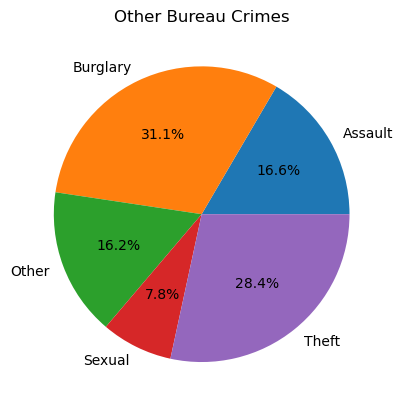

In [90]:
other_crimes = crime_count[5:10]             

print(crime_categories, other_crimes)   
plt.pie(other_crimes, labels=crime_categories, autopct='%1.1f%%')
plt.title("Other Bureau Crimes")
plt.show()   

In [91]:
other_crimes = crime_count[10:15]             

print(crime_categories, south_crimes)   
plt.pie(south_crimes, labels=crime_categories, autopct='%1.1f%%')
plt.title("South Bureau Crimes")
plt.show()   

NameError: name 'south_crimes' is not defined

In [92]:
other_crimes = crime_count[15:20]             

print(crime_categories, Valley_crimes)   
plt.pie(valley_crimes, labels=crime_categories, autopct='%1.1f%%')
plt.title("Valley Bureau Crimes")
plt.show()   

NameError: name 'Valley_crimes' is not defined

In [93]:
# Valley Bureau
['Assault' 'Burglary' 'Other 'Sexual' 'Theft'] [65336, 83253, 45298, 26712, 64705]

SyntaxError: unterminated string literal (detected at line 2) (2569421424.py, line 2)

In [94]:
other_crimes = crime_count[20:25]             

print(crime_categories, valley_crimes)   
plt.pie(valley_crimes, labels=crime_categories, autopct='%1.1f%%')
plt.title("Valley Bureau Crimes")
plt.show()   

NameError: name 'south_crimes' is not defined

In [ ]:
#West Bureau
['Assault' 'Burglary' 'Other' 'Sexual' 'Theft'] [5735, 10754, 5592, 2709, 9830]